In [1]:
# import the necessary library 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from numpy import *

In [2]:
training_file = "../data/original/train.csv"
test_file = "../data/original/test.csv" 
train_data = pd.read_csv(training_file)
test_data = pd.read_csv(test_file)

# Data Description
VARIABLE DESCRIPTIONS: <br>
survival        Survival  <br>
                (0 = No; 1 = Yes) <br>
pclass          Passenger Class  <br>
                (1 = 1st; 2 = 2nd; 3 = 3rd) <br>
name            Name   <br>
sex             Sex    <br>
age             Age    <br>
sibsp           Number of Siblings/Spouses Aboard   <br>
parch           Number of Parents/Children Aboard   <br>
ticket          Ticket Number                       <br>
fare            Passenger Fare                      <br>
cabin           Cabin                               <br>
embarked        Port of Embarkation                 <br>
                (C = Cherbourg; Q = Queenstown; S = Southampton) <br>

SPECIAL NOTES:   <br>
Pclass is a proxy for socio-economic status (SES) <br>
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower    <br>

Age is in Years; Fractional if Age less than One (1) <br>
 If the Age is Estimated, it is in the form xx.5 <br>

With respect to the family relation variables (i.e. sibsp and parch) <br>
some relations were ignored.  The following are the definitions used <br>
for sibsp and parch.      <br>

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic <br>
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored) <br>
Parent:   Mother or Father of Passenger Aboard Titanic <br>
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic <br>

Other family relatives excluded from this study include cousins, <br>
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled <br>
only with a nanny, therefore parch=0 for them.  As well, some <br>
travelled with very close friends or neighbors in a village, however, <br>
the definitions do not support such relations.  <br>

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.info()
print ("--------------------------------------------")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-

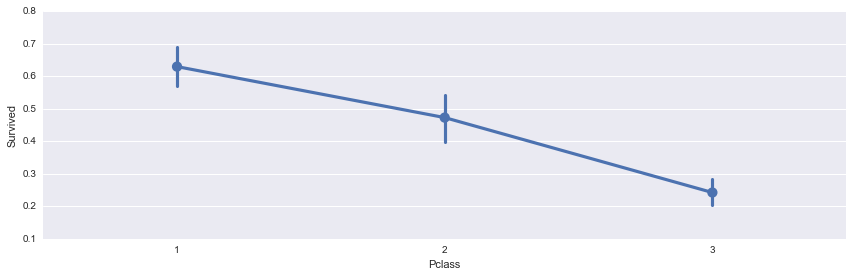

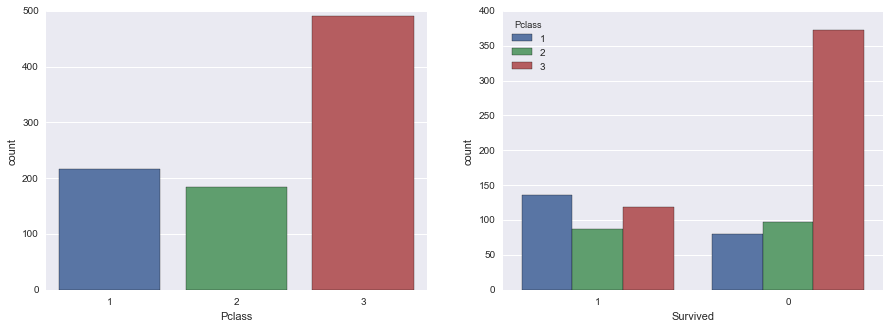

In [6]:
# Let's start from Pclass
sns.factorplot("Pclass","Survived",  data = train_data, size = 4, aspect = 3)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Pclass', data=train_data, ax=axis1)
sns.countplot(x='Survived', hue="Pclass", data=train_data, order=[1,0], ax=axis2)

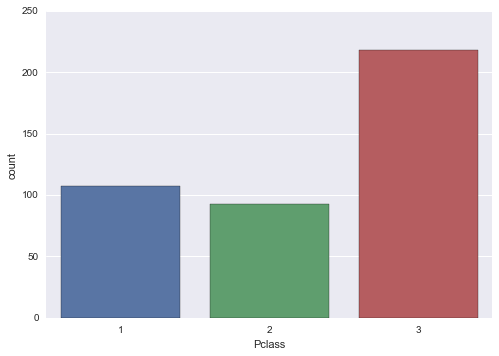

In [7]:
# Let's look at the test data regarding with Pclass
sns.countplot(x = "Pclass", data = test_data)

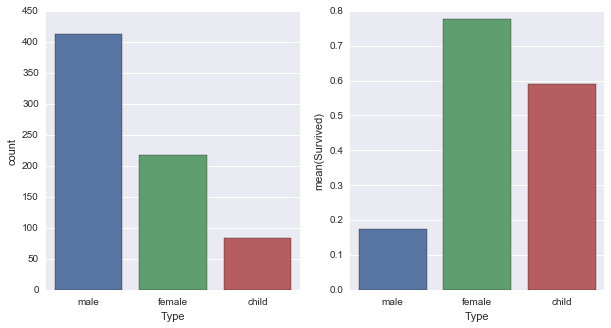

In [8]:
# Let's look at Sex 
def get_type(passenger):
    sex, age = passenger
    return 'child' if not isnan(age) and age < 16 else sex
train_data["Type"] = train_data[["Sex", "Age"]].apply(get_type, axis = 1)
test_data["Type"] = test_data[["Sex", "Age"]].apply(get_type, axis = 1)

train_non = train_data[train_data["Age"].notnull()]
train_miss = train_data[train_data["Age"].isnull()]

test_non = test_data[test_data["Age"].notnull()]
test_miss = test_data[test_data["Age"].isnull()]

# plot data with non-missing Age 
fig, (axis1, axis2) = plt.subplots(1, 2, figsize =  (10,5))
sns.countplot(x = "Type", data = train_non, ax = axis1)

train_perc = train_non[["Type", "Survived"]].groupby(["Type"], as_index = False).mean()
sns.barplot(x = "Type", y = "Survived", data = train_perc, ax = axis2, order = ["male", "female", "child"])

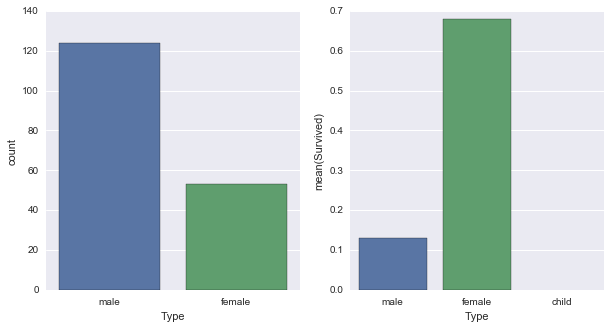

In [9]:
# plot data with non-missing Age 
fig, (axis1, axis2) = plt.subplots(1, 2, figsize =  (10,5))
sns.countplot(x = "Type", data = train_miss, ax = axis1)

train_perc = train_miss[["Type", "Survived"]].groupby(["Type"], as_index = False).mean()
sns.barplot(x = "Type", y = "Survived", data = train_perc, ax = axis2, order = ["male", "female", "child"])

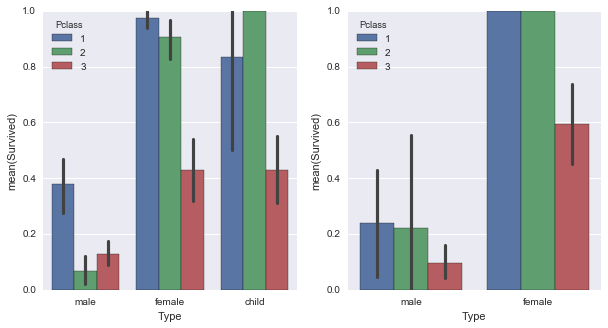

In [10]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (10, 5))
sns.barplot(x = "Type", y = "Survived", hue = "Pclass", data = train_non, ax = axis1)
sns.barplot(x = "Type", y = "Survived", hue = "Pclass", data = train_miss, ax = axis2)

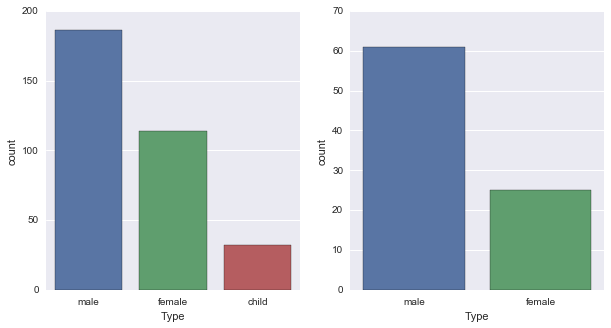

In [11]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(x = "Type", data = test_non, ax = axis1)
sns.countplot(x = "Type", data = test_miss, ax = axis2)

Since there are 277 missing data for **age** in training dataset and 86 for **age** in test dataset, those samples with missing data is not counted towards the above plots.

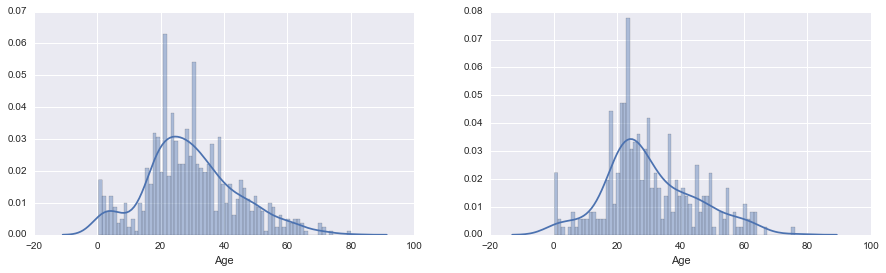

In [12]:
# Now let's explore age
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))
sns.distplot(train_non["Age"],bins = 70, ax = axis1)
sns.distplot(test_non["Age"],bins = 70, ax = axis2)

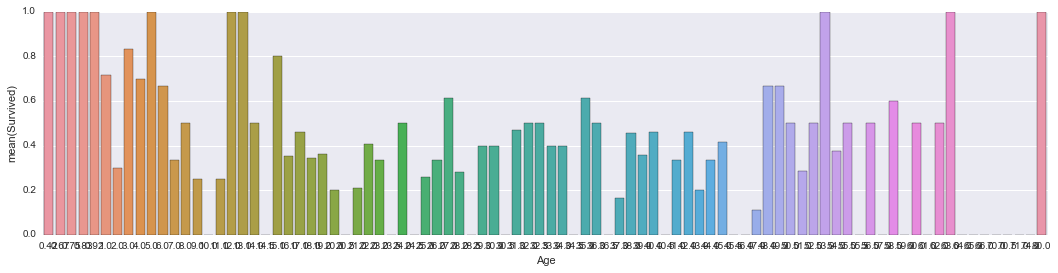

In [13]:
# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_non[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

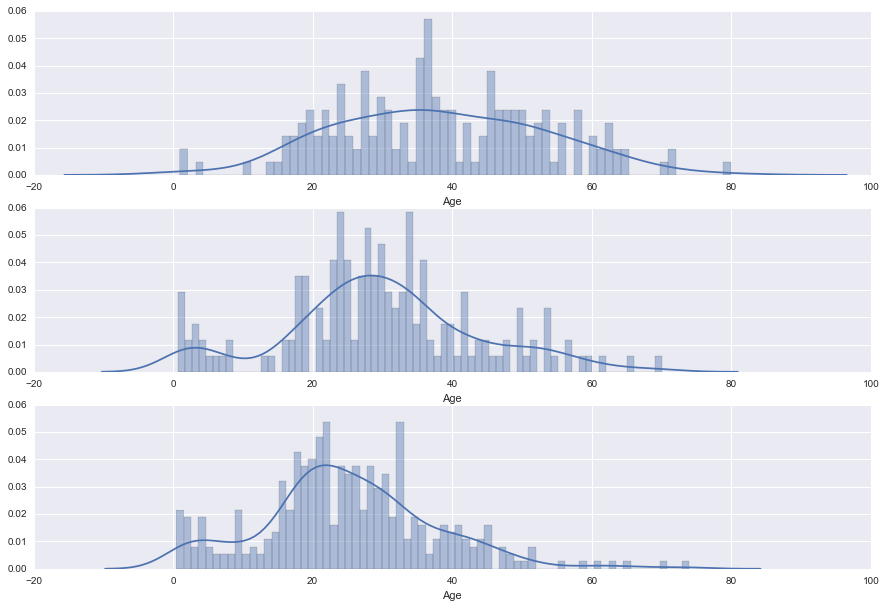

In [15]:
fig, (axis1, axis2, axis3) = plt.subplots(3, 1, figsize=(15, 10))
sns.distplot(train_non[train_non["Pclass"] == 1]["Age"],bins = 70, ax = axis1)
sns.distplot(train_non[train_non["Pclass"] == 2]["Age"],bins = 70, ax = axis2)
sns.distplot(train_non[train_non["Pclass"] == 3]["Age"],bins = 70, ax = axis3)